In [47]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file

In [48]:
df = pd.read_excel(
    "/Users/tonygong/Downloads/lag_comparison.xlsx"
)  # Replace the file path with the correct Excel file path
df

,Model,MAE,MAPE,RMSE,RMSPE,R-squared,Horizon
0,DSTGCRN,0.013497,0.016847,0.024503,0.027903,0.967013,3
1,DSTGCRN,0.013164,0.016524,0.023177,0.026728,0.969027,5
2,DSTGCRN,0.011321,0.014103,0.019971,0.021687,0.978462,7
3,DSTGCRN,0.012641,0.015929,0.021755,0.024115,0.973957,9
4,DSTGCRN,0.011168,0.014004,0.019996,0.022322,0.976311,11
5,AGCRN,0.014647,0.018326,0.026194,0.029958,0.961782,3
6,AGCRN,0.014818,0.018530,0.026189,0.030141,0.960961,5
7,AGCRN,0.014989,0.018467,0.025899,0.029490,0.962271,7
8,AGCRN,0.015200,0.018593,0.026342,0.029612,0.960848,9
9,AGCRN,0.014528,0.017978,0.025575,0.029211,0.961137,11


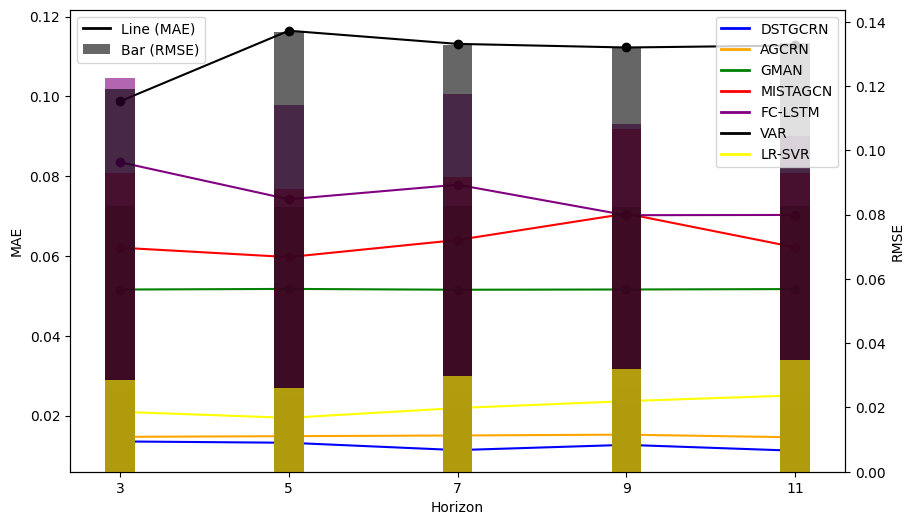

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Assuming df is your DataFrame

# Filter out rows where Horizon is 0
df = df[df["Horizon"] != 0]

# List of unique models and colors for each model
models = df["Model"].unique()
colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "black",
    "yellow",
]  # add more colors if you have more models

# Define bar width
bar_width = 0.35

# Start figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MAE as a line chart
for i, model in enumerate(models):
    data = df[df["Model"] == model]
    ax1.plot(data["Horizon"], data["MAE"], marker="o", color=colors[i])

ax1.set_xlabel("Horizon")
ax1.set_ylabel("MAE")

# Set the x-axis tick labels
ax1.set_xticks([3, 5, 7, 9, 11])

# Create a second y-axis for RMSE
ax2 = ax1.twinx()
for i, model in enumerate(models):
    data = df[df["Model"] == model]
    ax2.bar(data["Horizon"], data["RMSE"], width=bar_width, color=colors[i], alpha=0.6)


ax2.set_ylabel("RMSE")

# Create legends for plot types and models
legend_elements = [
    Line2D([0], [0], color="black", lw=2, label="Line (MAE)"),
    Patch(facecolor="black", alpha=0.6, label="Bar (RMSE)"),
]
ax1.legend(handles=legend_elements, loc="upper left")

legend_elements = [
    Line2D([0], [0], color=colors[i], lw=2, label=model)
    for i, model in enumerate(models)
]
ax2.legend(handles=legend_elements, loc="upper right")

plt.show()